# Data anaylsis

### Importing libraries

In [61]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import pylab as py 
import statsmodels.stats as stats
from scipy.stats import shapiro
import scipy.stats as stats
 


In [44]:
colors_image_formats= ["#F6511D", "#3B8EA5","#7FB800","#9e73ff"]
color_browsers = ["#EE6352","#59CD90","#3fa7d6","#FAC05E","#F79D84","#5e5e5e"]

## Aggregate data

In [45]:
folder_path = "./raw_data_macOS/websites/"
df_combined = pd.DataFrame()
file_list = os.listdir(folder_path)
column_names = ["run_id","browser","image_format","FP","FCP","TTFB","PLT","fetch_time"]

df_csv_concat = pd.concat([pd.read_csv(folder_path + file, names=column_names) for file in file_list], ignore_index=True)
df_csv_concat = df_csv_concat.sort_values(["run_id"])
print(df_csv_concat.head())
df_csv_concat.to_csv("combined_website_performance_data.csv",index=False)

      run_id        browser image_format         FP    FCP  TTFB   PLT  \
0          1         chrome          png  undefined  191.2  13.7  1515   
1570       2          opera          png  undefined  594.6  11.5  1614   
788        3        firefox          png  undefined  143.0    25  1624   
2368       4  edge_chromium          png  undefined  161.5  12.3  1685   
3161       5         safari          png  undefined  260.0    52  1543   

      fetch_time  
0           79.2  
1570       403.0  
788         75.0  
2368        99.8  
3161        80.0  


# Visualization of data

### Only images without browsers

In [46]:
def visualize_metrix_boxplot_by_image_format(metric):
    df = pd.read_csv("combined_website_performance_data.csv")
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="image_format", y=metric, palette=color_browsers)
    plt.title("Page Load Time by Image Format")
    plt.xlabel("Image Format")
    plt.ylabel(metric)
    plt.savefig("plt_by_image_format.png")
    plt.show()
    
    # print statistics 
    print("Statistics for " + metric + " by image format")
    print(df.groupby("image_format")[metric].describe())
    

/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


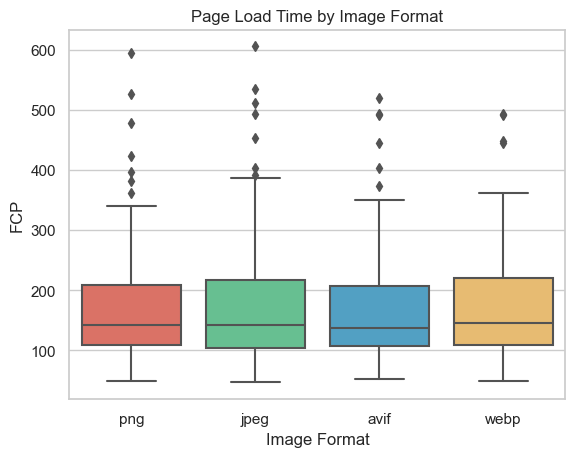

Statistics for FCP by image format
              count        mean        std   min      25%     50%    75%  \
image_format                                                               
avif          993.0  164.979255  79.257972  52.9  107.500  137.20  206.2   
jpeg          997.0  165.702307  81.167421  46.5  103.600  142.20  217.4   
png           962.0  164.910083  78.041980  49.4  108.025  142.85  209.0   
webp          995.0  165.949648  77.654103  49.1  108.500  145.70  220.5   

                max  
image_format         
avif          520.0  
jpeg          606.0  
png           594.6  
webp          492.6  


In [47]:
visualize_metrix_boxplot_by_image_format("FCP")

### Metric Boxplot per Image_format 

In [48]:
def visualize_metrix_boxplot_by_image_format(metric):
    df = pd.read_csv("combined_website_performance_data.csv")
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="image_format", y=metric, hue="browser",palette=color_browsers)
    plt.title("Page Load Time by Image Format")
    plt.xlabel("Image Format")
    plt.ylabel(metric)
    plt.savefig("plt_by_image_format.png")
    plt.show()

/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


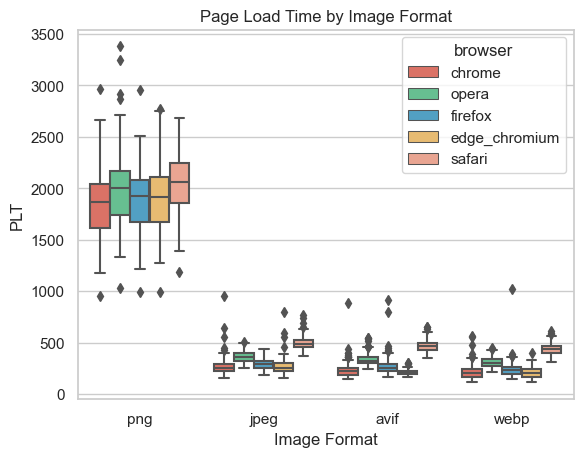

In [49]:
visualize_metrix_boxplot_by_image_format("PLT")

### Boxplot per metric and BROWSER

In [50]:
def boxplot_per_metric_and_browser(metric,browser):
    df = pd.read_csv("combined_website_performance_data.csv")
    df = df[df["browser"]==browser]
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="image_format", y=metric, palette=colors_image_formats)
    plt.title("Page Load Time by Image Format")
    plt.xlabel("Image Format")
    plt.ylabel(metric)
    plt.savefig("plt_by_image_format.png")
    plt.show()

/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


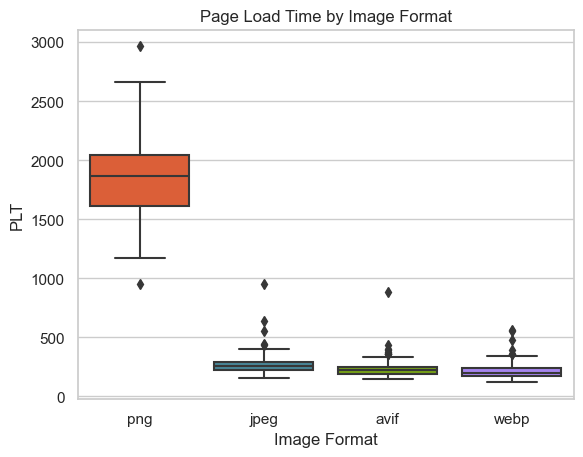

In [51]:
boxplot_per_metric_and_browser('PLT', 'chrome')

### Boxplot per metric and IMAGE_FORMAT

In [52]:
def boxplot_per_metric_and_browser(metric,image_formats):
    df = pd.read_csv("combined_website_performance_data.csv")
    df = df[df["image_format"].isin(image_formats)]
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="browser", y=metric, hue="image_format", palette="Set1")
    plt.xlabel("Browser")
    plt.ylabel(metric)  
    plt.show()

/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


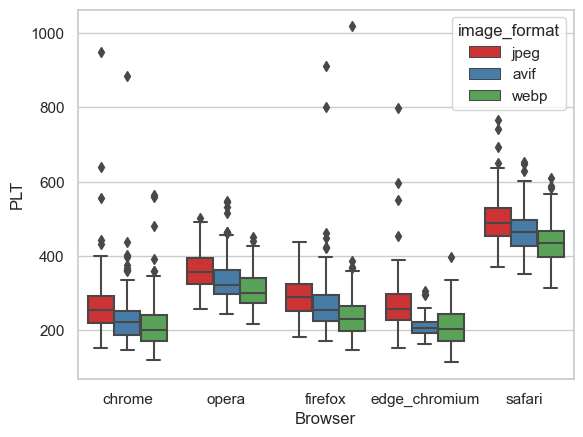

/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


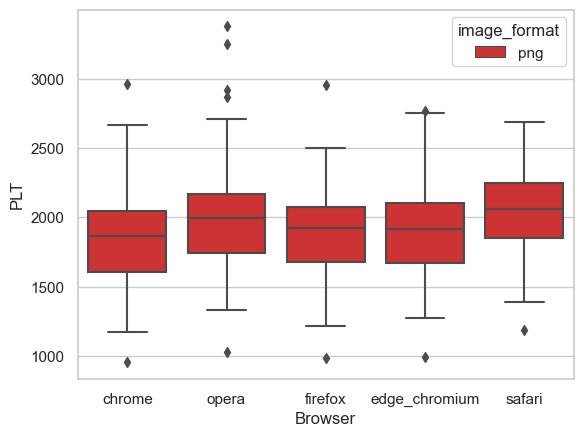

In [53]:
boxplot_per_metric_and_browser("PLT",["jpeg","avif","webp"])
boxplot_per_metric_and_browser("PLT",["png"])

## Combine PLT per Browser and Image Format

/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Python/3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Pyt

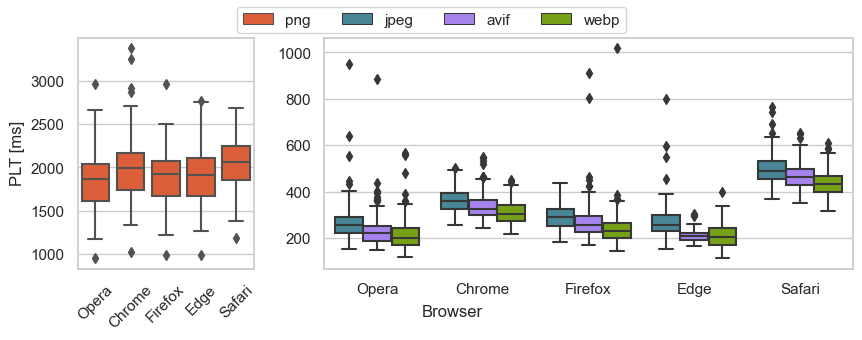

In [54]:
colors_image_formats= ["#F6511D", "#3B8EA5","#9e73ff","#7FB800"]
#colors = ["#3B8EA5","#F6511D", "#FFB400", "#646F58", "#7FB800", "#3B8EA5", 
#             "#b4dae4","#fcc6b6", "#ffe099", "#ccd2c6", "#dfff99", "#3B8EA5"]

df = pd.read_csv("combined_website_performance_data.csv")
fig, axes = plt.subplots(1, 2, figsize=(10,5), gridspec_kw={'width_ratios': [1, 3]})
fig.text(0.5, -0.05, 'Browser', ha='center')

sns.set(style="whitegrid")
df_left = df[df["image_format"].isin(["png"])]
ax = sns.boxplot(ax=axes[0], data=df_left, x="browser", y="PLT", palette=colors_image_formats[0:1], hue="image_format")
ax.set_ylabel("PLT [ms]")
ax.set_xticklabels(["Opera", "Chrome", "Firefox", "Edge", "Safari"], rotation=45)
ax.set_xlabel("")
ax.legend([],[], frameon=False) 


df_right = df[df["image_format"].isin(["jpeg","avif","webp"])]
ax2 = sns.boxplot(ax=axes[1], data=df_right, x="browser", y="PLT", hue="image_format", palette=colors_image_formats[1:4])
ax2.set_xticklabels(["Opera", "Chrome", "Firefox", "Edge", "Safari"], rotation=45)
ax2.legend([],[], frameon=False)
ax2.set_xlabel("")
ax2.set_ylabel("")
lines = []
labels = []
counter = 0

for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    lines.extend(Line)
    labels.extend(Label)
    
  
# rotating x-axis labels of last sub-plot
plt.xticks(rotation=0)
#set width and height ratio 
fig.set_size_inches(10, 3)
  
fig.legend(lines, labels, loc='upper center', ncol=4, fancybox=True)

plt.savefig("plt_macOS.pdf", dpi=300, bbox_inches='tight', )
plt.show()


Assumption for ANOVA

In [68]:
metric = "PLT"
df = pd.read_csv("combined_website_performance_data.csv")
size = 60

browsers = ["chrome","firefox","edge_chromium","safari"]
image_formats = ["png","jpeg","webp","avif"]

from scipy.stats import kruskal

for browser in browsers:
    df_browser = df[df["browser"] == browser]
    png_PLT = df_browser[df_browser["image_format"] == "png"]["PLT"]
    jpg_PLT = df_browser[df_browser["image_format"] == "jpeg"]["PLT"]
    webp_PLT = df_browser[df_browser["image_format"] == "webp"]["PLT"]
    avif_PLT = df_browser[df_browser["image_format"] == "avif"]["PLT"]
    #remove 5% outliers 
    
    IQR = png_PLT.quantile(0.75) - png_PLT.quantile(0.25)
    png_PLT = png_PLT[~((png_PLT < (png_PLT.quantile(0.25) - 1.5 * IQR)) |(png_PLT > (png_PLT.quantile(0.75) + 1.5 * IQR)))]
    IQR = jpg_PLT.quantile(0.75) - jpg_PLT.quantile(0.25)
    jpg_PLT = jpg_PLT[~((jpg_PLT < (jpg_PLT.quantile(0.25) - 1.5 * IQR)) |(jpg_PLT > (jpg_PLT.quantile(0.75) + 1.5 * IQR)))]
    IQR = webp_PLT.quantile(0.75) - webp_PLT.quantile(0.25)
    webp_PLT = webp_PLT[~((webp_PLT < (webp_PLT.quantile(0.25) - 1.5 * IQR)) |(webp_PLT > (webp_PLT.quantile(0.75) + 1.5 * IQR)))]
    IQR = avif_PLT.quantile(0.75) - avif_PLT.quantile(0.25)
    avif_PLT = avif_PLT[~((avif_PLT < (avif_PLT.quantile(0.25) - 1.5 * IQR)) |(avif_PLT > (avif_PLT.quantile(0.75) + 1.5 * IQR)))]
    
    # 
    
    print("-------------------"+browser+"-------------------")
    a, b= shapiro(png_PLT)
    if b < 0.05:
        print("png not normal distributed")
    else:
        print("png normal distributed")

    a, b= shapiro(jpg_PLT)
    if b < 0.05:
        print(b)
        print("jpg not normal distributed")
    else:
        print("jpg normal distributed")
    
    a, b= shapiro(webp_PLT)
    if b < 0.05:
        print("webp not normal distributed")
    else:
        print("webp normal distributed")
    
    a, b= shapiro(avif_PLT)
    if b < 0.05:
        print("avif not normal distributed")
    else:
        print("avif normal distributed")

    # sns.displot(png_PLT, kde=True, bins=10)
    # sns.displot(jpg_PLT, kde=True, bins=10)
    # sns.displot(webp_PLT, kde=True, bins=10)
    # sns.displot(avif_PLT, kde=True, bins=10)

    print(np.var(png_PLT),np.var(jpg_PLT),np.var(webp_PLT),np.var(avif_PLT))
    print(stats.levene(png_PLT, jpg_PLT, webp_PLT, avif_PLT))

    statistic, kruskal = kruskal(png_PLT, jpg_PLT, webp_PLT, avif_PLT)
    print("Kruskal Wallis H-test test statistic:", statistic)
    print("Kruskal Wallis H-test p-value:", kruskal)
  


    

-------------------chrome-------------------
png normal distributed
jpg normal distributed
webp not normal distributed
avif not normal distributed
94671.69231570179 2472.0726999382537 2120.3868144044322 1741.6208641940004
LeveneResult(statistic=214.64389661248853, pvalue=6.682358488542743e-101)
Kruskal Wallis H-test test statistic: 489.22852764728225
Kruskal Wallis H-test p-value: 1.0302816903908355e-105
-------------------firefox-------------------
png normal distributed
jpg normal distributed
webp not normal distributed
avif not normal distributed
73737.11565581027 2582.9649756319286 2250.575255102041 2238.01976830694
LeveneResult(statistic=242.8505356283399, pvalue=1.0256173272373784e-110)


TypeError: 'numpy.float64' object is not callable

## One-Way-Anova between image formats per Browser

In [62]:
# One-Way Anova for one browser and image format
metric = "PLT"
df = pd.read_csv("combined_website_performance_data.csv")
size = 60

browsers = ["opera","chrome","firefox","edge_chromium","safari"]
image_formats = ["png","jpeg","webp","avif"]

for browser in browsers:
    df_browser = df[df["browser"] == browser]
    png = df_browser[df_browser["image_format"] == "png"].sample(n=size, random_state=1)
    jpg = df_browser[df_browser["image_format"] == "jpeg"]
    webp = df_browser[df_browser["image_format"] == "webp"]
    avif = df_browser[df_browser["image_format"] == "avif"]
    
    print("Browser: ", browser)
    print(stats.f_oneway(png[metric], jpg[metric], webp[metric], avif[metric]))
    print("-- PNG: (Q1: ", np.quantile(png[metric], 0.25), ", mean: ", np.median(png[metric]), ", Q3: ", np.quantile(png[metric], 0.75), ")")
    print("-- JPG: (Q1: ", np.quantile(jpg[metric], 0.25), ", mean: ", np.median(jpg[metric]), ", Q3: ", np.quantile(jpg[metric], 0.75), ")")
    print("-- WEBP: (Q1: ", np.quantile(webp[metric], 0.25), ", mean: ", np.median(webp[metric]), ", Q3: ", np.quantile(webp[metric], 0.75), ")")
    print("-- AVIF: (Q1: ", np.quantile(avif[metric], 0.25), ", mean: ", np.median(avif[metric]), ", Q3: ", np.quantile(avif[metric], 0.75), ")")
    


Browser:  opera
F_onewayResult(statistic=3271.0664154001593, pvalue=0.0)
-- PNG: (Q1:  1697.5 , mean:  1895.0 , Q3:  2147.25 )
-- JPG: (Q1:  326.0 , mean:  358.0 , Q3:  395.25 )
-- WEBP: (Q1:  274.0 , mean:  301.5 , Q3:  340.5 )
-- AVIF: (Q1:  298.0 , mean:  323.0 , Q3:  363.0 )
Browser:  chrome
F_onewayResult(statistic=3125.545222826788, pvalue=0.0)
-- PNG: (Q1:  1569.25 , mean:  1839.0 , Q3:  2032.5 )
-- JPG: (Q1:  220.25 , mean:  255.0 , Q3:  292.75 )
-- WEBP: (Q1:  170.75 , mean:  200.5 , Q3:  241.25 )
-- AVIF: (Q1:  187.75 , mean:  222.5 , Q3:  252.25 )
Browser:  firefox
F_onewayResult(statistic=3824.322526065383, pvalue=0.0)
-- PNG: (Q1:  1718.75 , mean:  1967.0 , Q3:  2092.5 )
-- JPG: (Q1:  251.0 , mean:  290.0 , Q3:  326.0 )
-- WEBP: (Q1:  199.25 , mean:  230.0 , Q3:  266.0 )
-- AVIF: (Q1:  224.5 , mean:  256.0 , Q3:  296.0 )
Browser:  edge_chromium
F_onewayResult(statistic=4240.4268316155785, pvalue=0.0)
-- PNG: (Q1:  1705.75 , mean:  1945.5 , Q3:  2120.75 )
-- JPG: (Q1:  228.

## Two-Way-Anova

In [57]:
df = pd.read_csv("combined_website_performance_data.csv")

model = ols('PLT ~ C(image_format) + C(browser) + C(image_format):C(browser)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

# https://www.statology.org/two-way-anova-python/ 
# Both image_format and browser are significant and not depend 

,sum_sq,df,F,PR(>F)
C(image_format),1.926031e+09,3.0,22842.525044,0.000000e+00
C(browser),2.765703e+07,4.0,246.007159,8.268193e-189
C(image_format):C(browser),9.978169e+05,12.0,2.958501,4.061792e-04
Residual,1.103720e+08,3927.0,NaN,NaN
